## Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#bibliotecas para mexer nas imagens
from skimage.color import rgb2gray #deixar imagem preto e branco
from skimage.util import random_noise #usar o ruido sal e pimenta

#passa-baixa
from skimage.filters import median #filtro de mediana para o sal e pimenta
from skimage.morphology import disk #gera uma area de ocupacao plana em forma de disco https://scikit-image.org/docs/0.25.x/api/skimage.morphology.html#skimage.morphology.disk

#passa-alta
from skimage.filters import laplace, sobel, roberts

## Imagens

In [ ]:
img = plt.imread('./pintura.jpg')
img_gray = rgb2gray(img)
img_ruido = random_noise(img_gray, mode='s&p', amount=0.05, salt_vs_pepper=0.5)

## Todas as Imagens

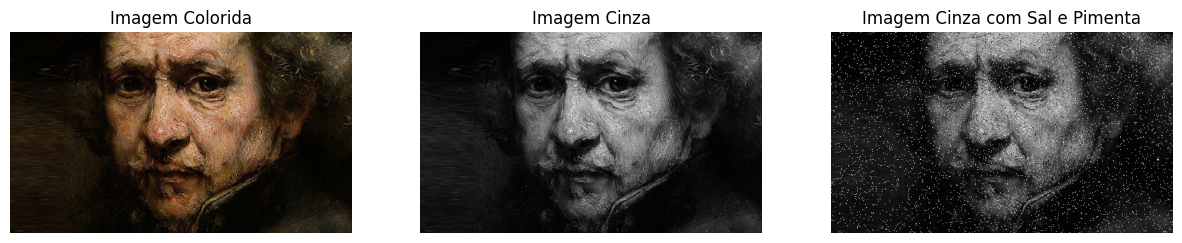

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagem Colorida")
ax[0].axis("off")

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Imagem Cinza")
ax[1].axis("off")

ax[2].imshow(img_ruido, cmap='gray')
ax[2].set_title("Imagem Cinza com Sal e Pimenta")
ax[2].axis("off")

plt.show()

## Aplicando Filtro Passa-Baixa Adequado e Plotando

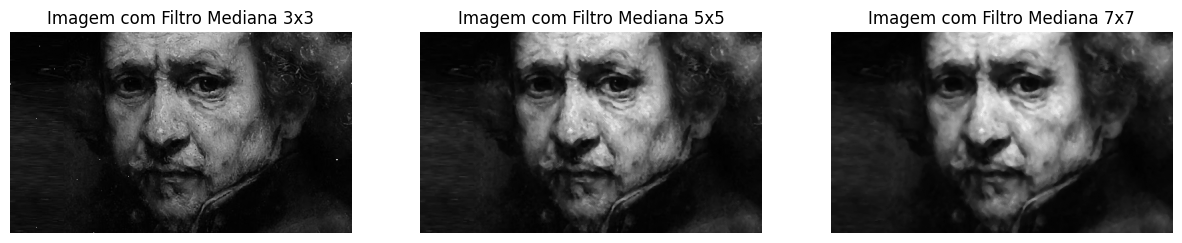

In [ ]:
img_mediana_3 = median(img_ruido, disk(1))
img_mediana_5 = median(img_ruido, disk(2))
img_mediana_7 = median(img_ruido, disk(3))

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(img_mediana_3, cmap='gray')
ax[0].set_title("Imagem com Filtro Mediana 3x3")
ax[0].axis("off")

ax[1].imshow(img_mediana_5, cmap='gray')
ax[1].set_title("Imagem com Filtro Mediana 5x5")
ax[1].axis("off")

ax[2].imshow(img_mediana_7, cmap='gray')
ax[2].set_title("Imagem com Filtro Mediana 7x7")
ax[2].axis("off")

plt.show()

O filtro de passa-baixa mais adequado para trata o ruido de sal e pimenta, é o filtro de mediana, isso se deve ao fato dele pegar os pixels em uma vizinhança e aplicar no central. O motivo para isso, é o fato do ruido sal e pimenta ser pontos pretos e brancos ao longo da imagem e o filtro em questão substituir tais pontos pela mediana dos vizinhos, o que apesar de borrar um pouco a imagem, ainda deixa ela nítida e sem o ruído.

É interessante observar a importância do tamanho do filtro, em que aquele que apresenta o melhor resultado sem perder muito da borda, neste caso, é o 5x5. Por esse motivo, ele será utilizado nos seguintes filtros.

## Realçando Borda com Passa-Alta

In [ ]:
#Passa-Alta 3x3
img_laplace_3 = laplace(img_mediana_3)
img_sobel_3 = sobel(img_mediana_3)
img_roberts_3 = roberts(img_mediana_3)

#Passa-Alta 5x5
img_laplace_5 = laplace(img_mediana_5)
img_sobel_5 = sobel(img_mediana_5)
img_roberts_5 = roberts(img_mediana_5)

#Passa-Alta 7x7
img_laplace_7 = laplace(img_mediana_7)
img_sobel_7 = sobel(img_mediana_7)
img_roberts_7 = roberts(img_mediana_7)

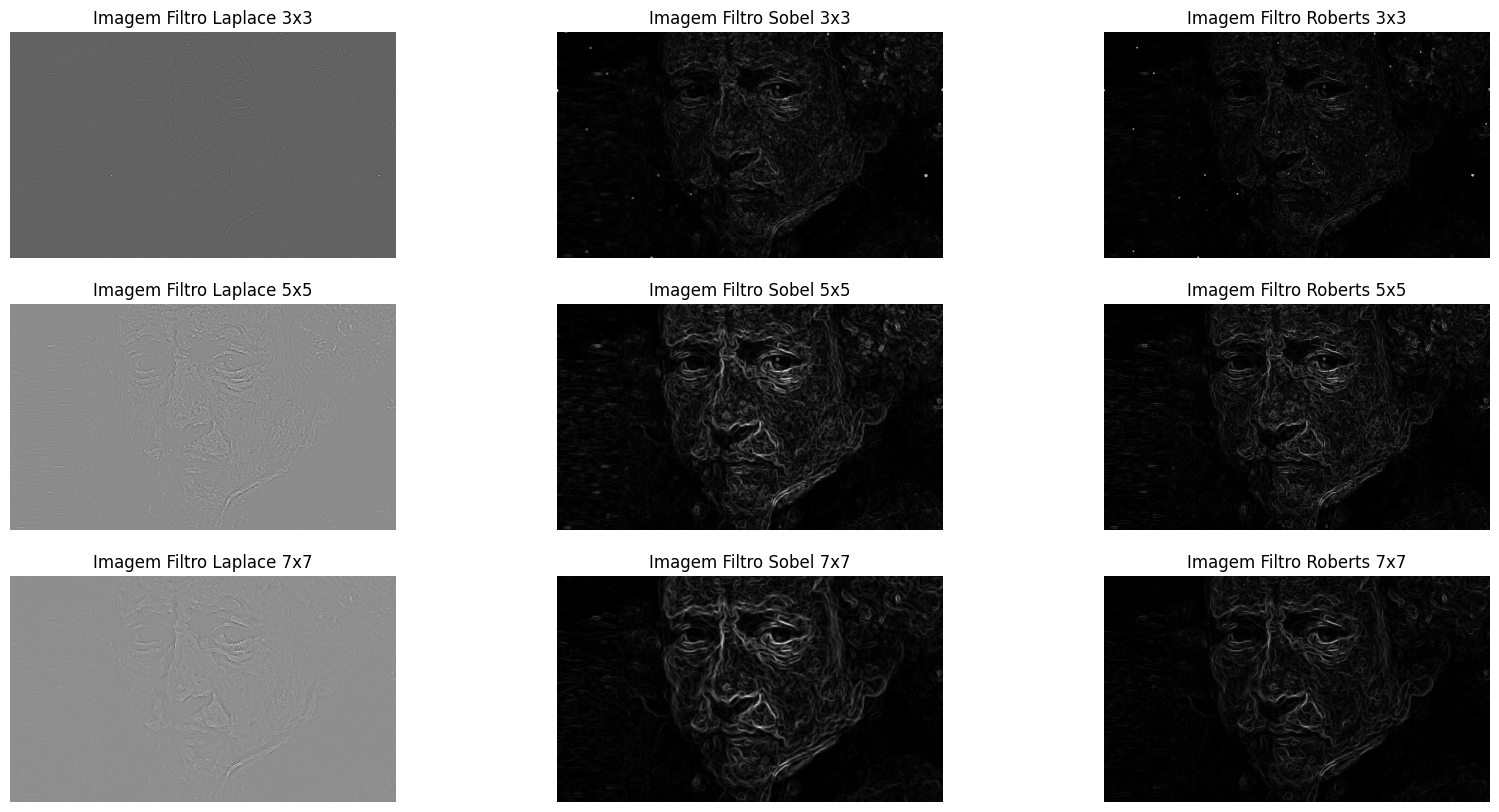

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.flatten() #funcao do numpy que transforma matrix em arranjo de uma dimensão

#3x3
ax[0].imshow(img_laplace_3, cmap='gray')
ax[0].set_title("Imagem Filtro Laplace 3x3")
ax[0].axis("off")

ax[1].imshow(img_sobel_3, cmap='gray')
ax[1].set_title("Imagem Filtro Sobel 3x3")
ax[1].axis("off")

ax[2].imshow(img_roberts_3, cmap='gray')
ax[2].set_title("Imagem Filtro Roberts 3x3")
ax[2].axis("off")

#5x5
ax[3].imshow(img_laplace_5, cmap='gray')
ax[3].set_title("Imagem Filtro Laplace 5x5")
ax[3].axis("off")

ax[4].imshow(img_sobel_5, cmap='gray')
ax[4].set_title("Imagem Filtro Sobel 5x5")
ax[4].axis("off")

ax[5].imshow(img_roberts_5, cmap='gray')
ax[5].set_title("Imagem Filtro Roberts 5x5")
ax[5].axis("off")

#7x7
ax[6].imshow(img_laplace_7, cmap='gray')
ax[6].set_title("Imagem Filtro Laplace 7x7")
ax[6].axis("off")

ax[7].imshow(img_sobel_7, cmap='gray')
ax[7].set_title("Imagem Filtro Sobel 7x7")
ax[7].axis("off")

ax[8].imshow(img_roberts_7, cmap='gray')
ax[8].set_title("Imagem Filtro Roberts 7x7")
ax[8].axis("off")

plt.show()

É perceptível a importância do filtro no realce das formas, onde um filtro maior acaba passando uma área maior da borda. A mediana que foi utilizada anteriormente afeta no resultado dos filtros passa-alta.

## Filtros na Ordem Inversa

In [ ]:
#passa-alta
img_laplace = laplace(img_ruido)
img_sobel = sobel(img_ruido)
img_roberts = roberts(img_ruido)

#passa-baixa
img_mediana_laplace_3 = median(img_laplace, disk(1))
img_mediana_laplace_5 = median(img_laplace, disk(2))
img_mediana_laplace_7 = median(img_laplace, disk(3))

img_mediana_sobel_3 = median(img_sobel, disk(1))
img_mediana_sobel_5 = median(img_sobel, disk(2))
img_mediana_sobel_7 = median(img_sobel, disk(3))

img_mediana_roberts_3 = median(img_roberts, disk(1))
img_mediana_roberts_5 = median(img_roberts, disk(2))
img_mediana_roberts_7 = median(img_roberts, disk(3))

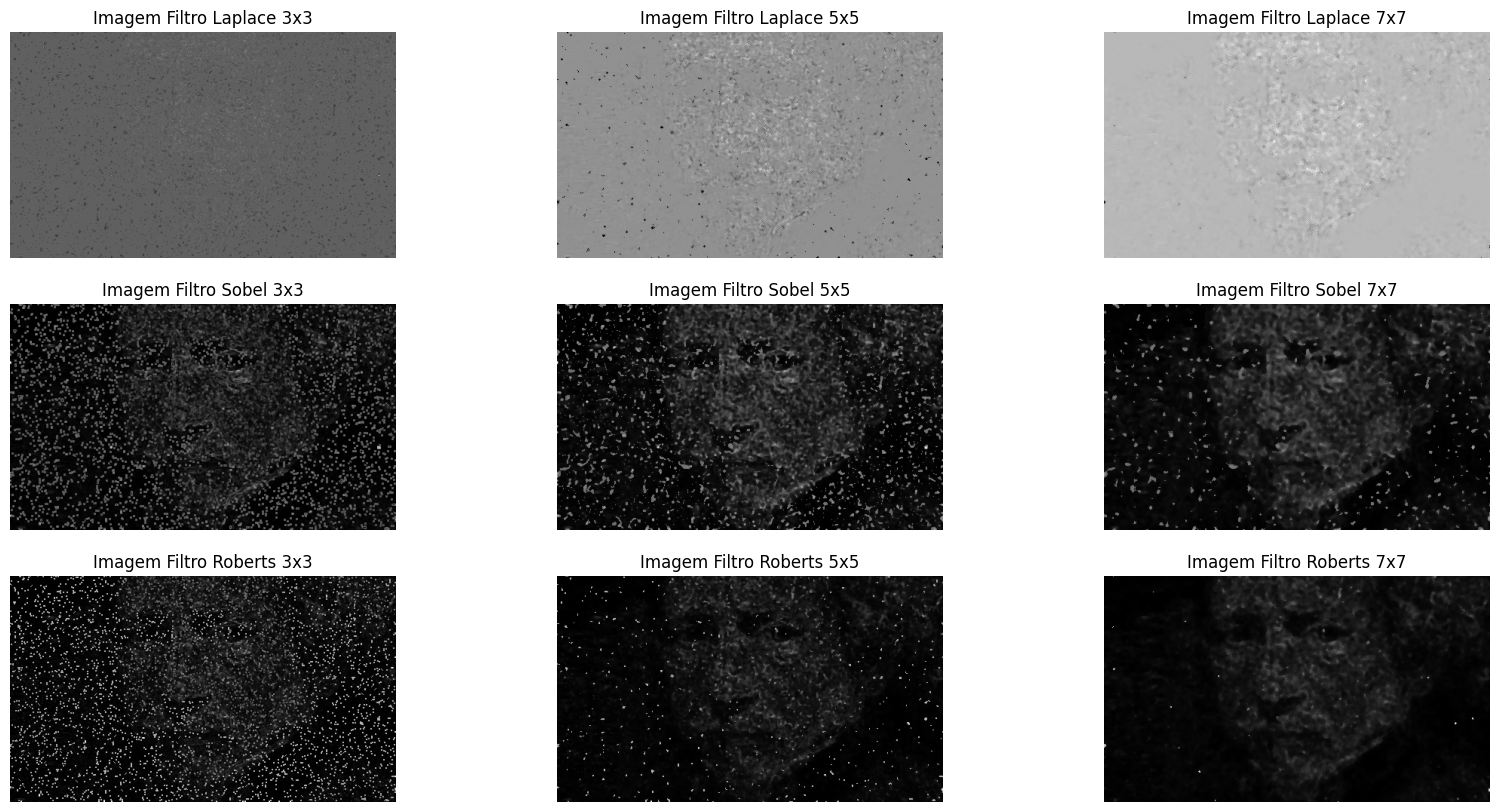

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
ax = ax.flatten() #funcao do numpy que transforma matrix em arranjo de uma dimensão

#laplace
ax[0].imshow(img_mediana_laplace_3, cmap='gray')
ax[0].set_title("Imagem Filtro Laplace 3x3")
ax[0].axis("off")

ax[1].imshow(img_mediana_laplace_5, cmap='gray')
ax[1].set_title("Imagem Filtro Laplace 5x5")
ax[1].axis("off")

ax[2].imshow(img_mediana_laplace_7, cmap='gray')
ax[2].set_title("Imagem Filtro Laplace 7x7")
ax[2].axis("off")

#sobel
ax[3].imshow(img_mediana_sobel_3, cmap='gray')
ax[3].set_title("Imagem Filtro Sobel 3x3")
ax[3].axis("off")

ax[4].imshow(img_mediana_sobel_5, cmap='gray')
ax[4].set_title("Imagem Filtro Sobel 5x5")
ax[4].axis("off")

ax[5].imshow(img_mediana_sobel_7, cmap='gray')
ax[5].set_title("Imagem Filtro Sobel 7x7")
ax[5].axis("off")

#roberts
ax[6].imshow(img_mediana_roberts_3, cmap='gray')
ax[6].set_title("Imagem Filtro Roberts 3x3")
ax[6].axis("off")

ax[7].imshow(img_mediana_roberts_5, cmap='gray')
ax[7].set_title("Imagem Filtro Roberts 5x5")
ax[7].axis("off")

ax[8].imshow(img_mediana_roberts_7, cmap='gray')
ax[8].set_title("Imagem Filtro Roberts 7x7")
ax[8].axis("off")

plt.show()

O resultado mostra que não é ideal utilizar o passa alta primeiro e depois o passa baixa.